In [1]:
PROJECT_ROOT = '..'
CSV_FOLDER = 'csv'

%run _utils.ipynb

issues = load_issues()
library_versions = load_library_versions()

/Users/BenRombaut/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (14,16,17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [2]:
library_versions.head()

,package_name,version,version_published_at,version_release_type,broken_clients_count,time_until_next_release
0,3box,0.0.1,2018-08-20 14:13:14.031,NaN,0,15 days 21:44:20.609000
1,3box,0.0.2,2018-09-05 11:57:34.640,PATCH,0,1 days 16:38:51.812000
2,3box,0.0.3,2018-09-07 04:36:26.452,PATCH,0,0 days 00:59:30.090000
3,3box,0.0.4,2018-09-07 05:35:56.542,PATCH,0,4 days 07:42:30.188000
4,3box,0.0.5-beta-1,2018-09-11 13:18:26.730,PATCH,0,0 days 00:00:51.060000


In [3]:
grouped = library_versions.groupby(by=['package_name'])

result = {
    'package_name': list(),
    'broken_clients_count': list(),
    'time_until_next_release': list(),
}

for package, group in tqdm_notebook(grouped):
    no_breaks = group[group['broken_clients_count'] == 0]
    if not no_breaks.empty:
        med_time_until_next_release = \
            no_breaks[~pd.isna(no_breaks['time_until_next_release'])]['time_until_next_release'].median()
        result['package_name'].append(package)
        result['broken_clients_count'].append(0)
        result['time_until_next_release'].append(med_time_until_next_release)
    breaks = group[group['broken_clients_count'] != 0]
    for idx, row in breaks.iterrows():
        result['package_name'].append(row['package_name'])
        result['broken_clients_count'].append(row['broken_clients_count'])
        result['time_until_next_release'].append(row['time_until_next_release'])
        
for_graph = pd.DataFrame(result)
for_graph['time_until_next_release_seconds'] = \
    for_graph['time_until_next_release'].astype('timedelta64[s]') + 1


  0%|          | 0/7361 [00:00<?, ?it/s]

In [99]:

for_graph.describe()

,broken_clients_count,time_until_next_release,time_until_next_release_seconds
count,24360.000000,23624,23624.000000
mean,3.231117,33 days 21:56:33.148371127,814.455088
std,13.088075,74 days 18:04:17.637480406,1794.065813
min,0.000000,0 days 00:00:00,1.000000
25%,0.000000,1 days 19:28:24.906000,44.000000
50%,1.000000,7 days 23:09:26.644000,192.000000
75%,2.000000,29 days 02:55:26.851250,699.000000
max,625.000000,1741 days 00:31:52.336000,41785.000000


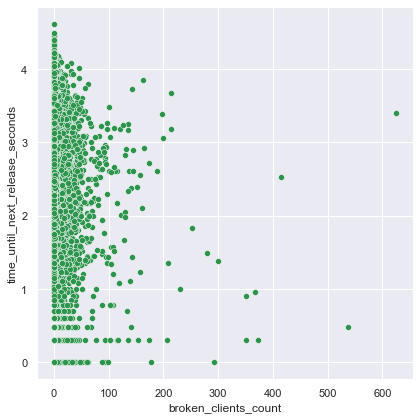

In [100]:
sns.set()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

x = for_graph['broken_clients_count']
y = np.log10(for_graph['time_until_next_release_seconds'])


params = dict(
    x=x,
    y=y,
)
ax = sns.scatterplot(
    **params,
    color=GK_GREEN,
)

fig.tight_layout()
plt.show()